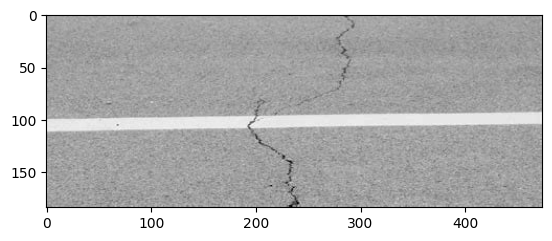

In [481]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load image
# img = cv2.imread("images/OIP-2653846351.jpg",0)  # replace with your image file
# img = cv2.imread("images/OIP-1674407897.jpg",0)  # replace with your image file
img = cv2.imread("images/OIP-2676360845.jpg", 0)  # replace with your image file
if img is None:
    raise FileNotFoundError("Image not found. Check the file path.")

# Convert to grayscale
normalized_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
gray = cv2.cvtColor(normalized_img, cv2.IMREAD_GRAYSCALE)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

In [492]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 3)

# Thresholding
_, thresh = cv2.threshold(blurred, 148, 255, cv2.THRESH_BINARY)

# clean up small noise
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

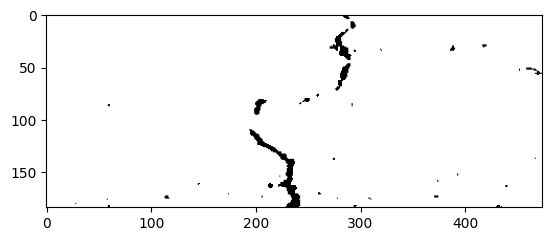

In [493]:
# Show results
plt.imshow(thresh)

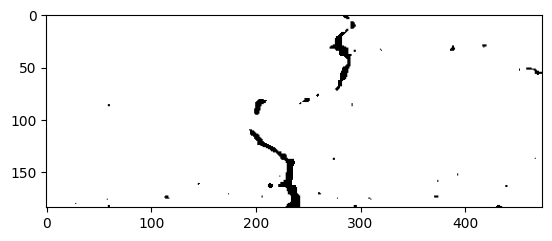

In [494]:
plt.imshow(cleaned)

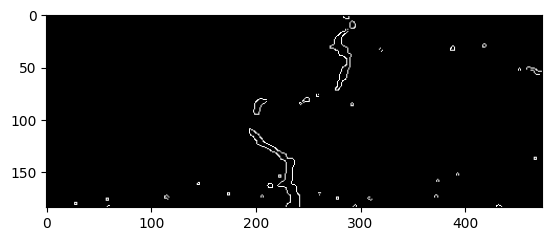

In [495]:
dge = cv2.Canny(cleaned, 50, 100, 5, L2gradient = True)
out = cv2.cvtColor(dge, cv2.IMREAD_GRAYSCALE)
plt.imshow(out)

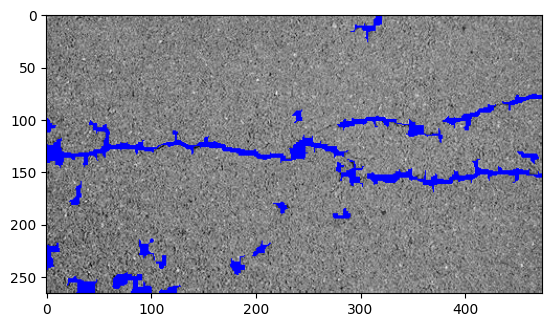

In [267]:
import cv2
import numpy as np

def detect_road_cracks(image_path, output_path="cracks_detected.jpg"):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Could not read image: {image_path}")
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Enhance contrast with CLAHE (adaptive histogram equalization)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Use Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)

    # Edge detection (Canny)
    edges = cv2.Canny(blurred, 150, 300, 2, L2gradient=True)

    # Morphological closing to connect cracks
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Optional: filter small objects (remove noise)
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(gray)
    for cnt in contours:
        if cv2.contourArea(cnt) > 50:  # keep only larger contours
            cv2.drawContours(mask, [cnt], -1, 255, -1)

    # Highlight detected cracks in red on original image
    result = img.copy()
    result[mask > 0] = [0, 0, 255]

    # Save and show results
    cv2.imwrite(output_path, result)
    # cv2.imshow("Original", img)
    plt.imshow(result)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

# Example usage:
detect_road_cracks("images/OIP-2653846351.jpg", "road_cracks.jpg")


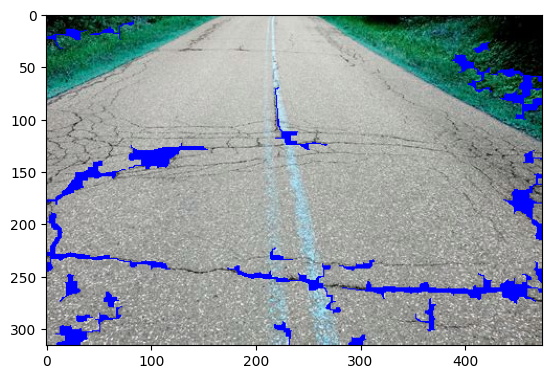

In [255]:
detect_road_cracks("images/OIP-1674407897.jpg", "road_cracks.jpg")

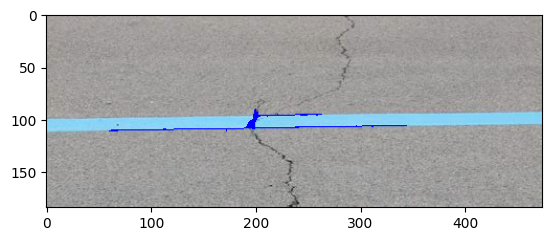

In [256]:
detect_road_cracks("images/OIP-2676360845.jpg", "road_cracks.jpg")